In [53]:
%matplotlib inline

import numpy as np

import menpo.io as mio
from menpo.image import Image
from menpo.feature import centralize, normalize_norm, normalize_std
from menpo.visualize import visualize_images

from alaborticcv2015.deepconvkernel.generative import GenerativeLDCN, learn_pca_filters

# PCA LDCN 

Choose whether to work with color or greyscale images and whether to learn the filters from landmarks or regular grid:

In [2]:
color = False
landmarks = True

if color:
    n_channels = 3
else:
    n_channels = 1

In [3]:
images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/trainset/', verbose=True, 
                           max_images=50):
    i.crop_to_landmarks_proportion_inplace(0.5)
    i = i.rescale_landmarks_to_diagonal_range(100)
    if not color:
        if i.n_channels == 3:
            i = i.as_greyscale(mode='average')
    images.append(i)

- Loading 50 assets: [====================] 100%

Build a PCA LinDeepConvNet:

In [54]:
net = GenerativeLDCN(learn_filters=learn_pca_filters, 
                     n_filters=8, 
                     n_layers=1,
                     architecture=3,
                     normalize_patches=centralize,
                     normalize_filters=None,
                     patch_shape=(7, 7))

if landmarks:
    net.learn_network_from_landmarks(images, group='PTS', verbose=True)
else:
    net.learn_network_from_grid(images, stride=(4, 4), verbose=True)

- Learning network
  - Done!


In [55]:
print '# of layers:', net.n_layers
print '# of filters:', net.n_filters
print '# of filters per layer:', net.n_filters_layer
print 'filters shape:', net.filters_shape

# of layers: 1
# of filters: 8
# of filters per layer: [8]
filters shape: (7, 7)


Save network:

In [56]:
mio.export_pickle(net, '/data/PhD/Models/alaborticcv2015/pca_net.pkl.gz', overwrite=True)

IOError: [Errno 2] No such file or directory: '/data/PhD/Models/alaborticcv2015/pca_net.pkl.gz'

Visualize the previous filters using the previous LinDeepConvNet:

In [63]:
filters = net.filters_spatial(type='real')

First layer spatial filters:

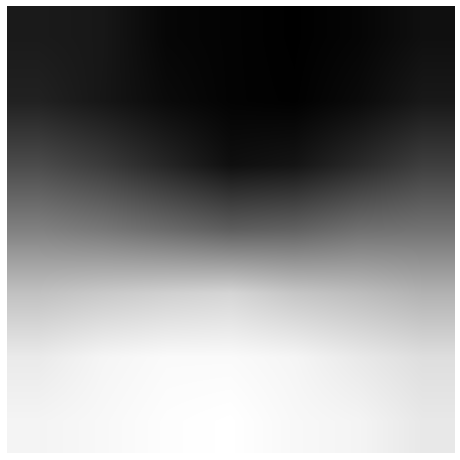

In [64]:
visualize_images(filters[0])

Second layer spatial filters:

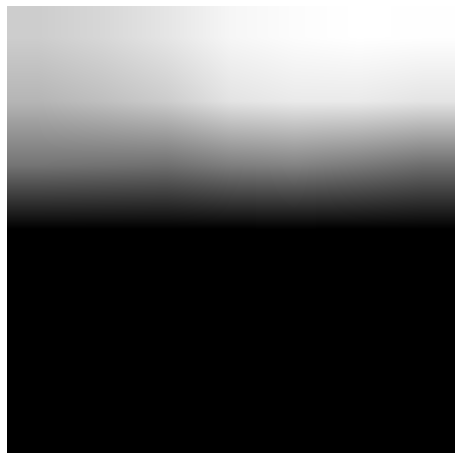

In [31]:
visualize_images(filters[1])

We can also visualize the previous filters on the frequency domain:

In [65]:
filters_frequecy = net.filters_frequency(ext_shape=(50, 50), type='abs')

First layer filters in the frequency domain:

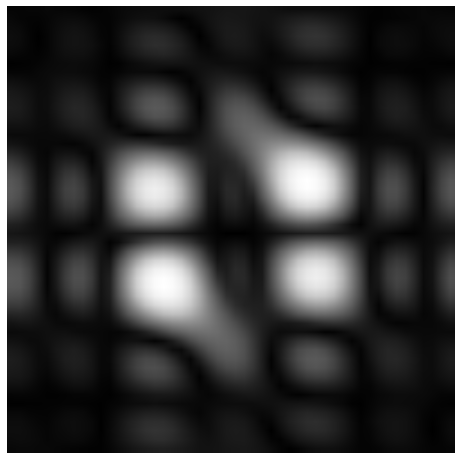

In [66]:
visualize_images(filters_frequecy[0])

Second layer filters in the frequency domain:

In [67]:
visualize_images(filters_frequecy[1])

IndexError: list index out of range

Visualize Deep Convolutional Kernels:

In [74]:
kernels = net.kernels_spatial(ext_shape=(50, 50), type='angle')

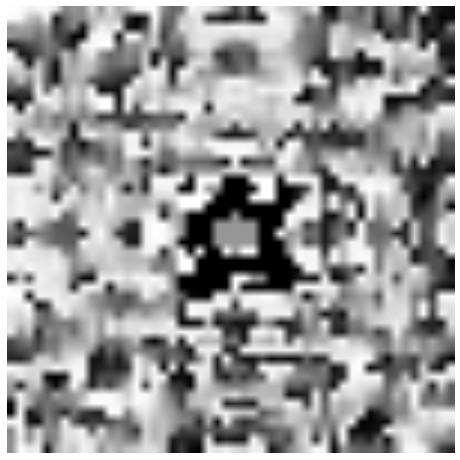

In [75]:
visualize_images(kernels)

In [76]:
kernels = net.kernels_frequency(ext_shape=(50, 50), type='abs')

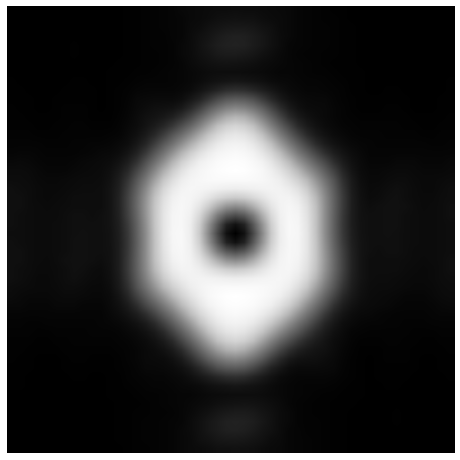

In [77]:
visualize_images(kernels)

Load images:

In [39]:
images = []
for i in mio.import_images('/Users/joan/PhD/DataBases/faces/lfpw/testset/', verbose=True, 
                           max_images=10):
    i.crop_to_landmarks_proportion_inplace(1)
    i = i.rescale_landmarks_to_diagonal_range(100)
    if not color:
        if i.n_channels == 3:
            i = i.as_greyscale(mode='average')
    images.append(i)

- Loading 10 assets: [====================] 100%

Choose one of the previous images:

In [40]:
image = images[0]

Compute network features:

TypeError: Image data can not convert to float

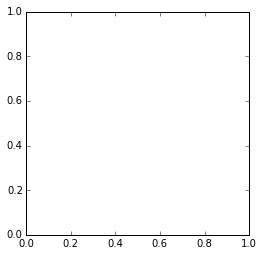

In [78]:
net.network_response(image).view_widget()

Compute deep convolutional kernel features:

TypeError: Image data can not convert to float

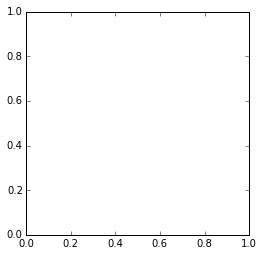

In [79]:
net.kernel_response(image).view_widget()

Check Network and Kernel equivalence:

In [80]:
network_r = net.network_response(image)
kernel_r = net.kernel_response(image)

print network_r.as_vector().conj().dot(network_r.as_vector())
print kernel_r.as_vector().conj().dot(kernel_r.as_vector())

(4063.4702499+0j)
(4052.92355075+0j)


In [94]:
np.imag((np.fft.fftshift(np.fft.ifft2(net._compute_kernel(ext_shape=(7, 7))))))

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]]])